In [9]:
# import appropriate phython modules / functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [12]:
# import data as a list
xdata = [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
ydata = [11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7]

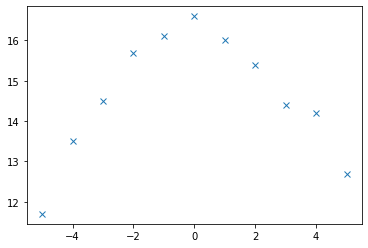

In [17]:
# Recast xdata and ydata into numpy arrags so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'x')

In [18]:
# The data looks like they can perhaps we described well by a Gaussian or by a cosine.
# Gaussian: y = A*exp(-B*x^2)
# Cosine: y = D*cos(E*x)

# The Gaussian fit

In [21]:
# Define the Gaussian function.
def Gauss(x,A,B):
    y = A*np.exp(-1*B*x**2)
    return y

In [24]:
# The curve fit function will return the parameters and covariance.
parameters, covariance = curve_fit(Gauss,xdata,ydata)
#help(curve_fit)
fit_A = parameters[0]
fit_B = parameters[1]

print(fit_A)
print(fit_B)

16.29760311243372
0.011369839501050175


/tmp/ipykernel_272/2173342942.py:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


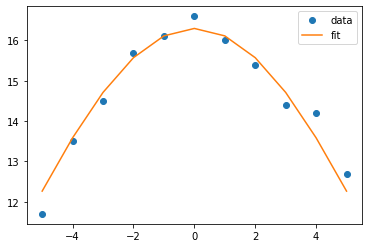

In [29]:
# Display the fit model alongside the data (no covariance or error yet!)
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata,ydata,'o', label='data')
plt.plot(xdata,fit_y,'-', label='fit')
plt.legend()

In [30]:
# THe standard error is the square root of the diagonal of the covariance matrix.
# The standard error is a list with A in SE[0] and B in SE[1]
SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]

print(F'The value of A is {fit_A:.5f} with the standard error of {SE_A:.5f}')
print(F'The value of B is {fit_B:.5f} with the standard error of {SE_B:.5f}')

The value of A is 16.29760 with the standard error of 0.17277
The value of B is 0.01137 with the standard error of 0.00090


# The Cosine Fit

-2.565671481620384
2.021158502201535


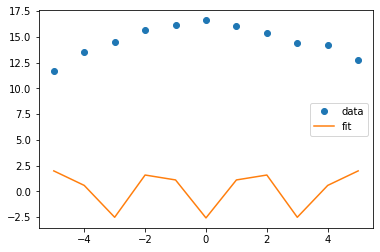

In [33]:
# Our first attempt, following what did above with Gaussian
def cos_func(x,D,E):
    y = D*np.cos(-1*E*x)
    return y

parameters, covariance = curve_fit(cos_func,xdata,ydata)
fit_D = parameters[0]
fit_E = parameters[1]

print(fit_D)
print(fit_E)

fit_y = cos_func(xdata, fit_D, fit_E)
plt.plot(xdata,ydata,'o', label='data')
plt.plot(xdata,fit_y,'-', label='fit')
plt.legend()

-2.565671481620384
2.021158502201535


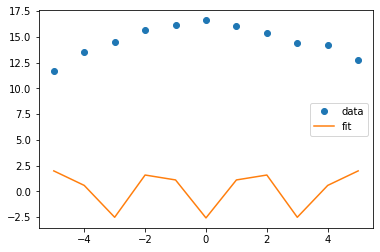

In [34]:
# We optimized the fit but apparently had a poor starting point.
# We see that the height (D) of the wave is about 16.
# We see that the frequency (D) of the wave is about 0.1 of a wave from 0 to 2/pi
# These approximate parameters can be utilized as a guess

guess = [16,0.1]
parameters, covariance = curve_fit(cos_func,xdata,ydata)
fit_D = parameters[0]
fit_E = parameters[1]

print(fit_D)
print(fit_E)

fit_y = cos_func(xdata, fit_D, fit_E)
plt.plot(xdata,ydata,'o', label='data')
plt.plot(xdata,fit_y,'-', label='fit')
plt.legend()

In [ ]:
# Let's 